# Algoritmos - Test 1

**Santiago Álvarez Sepúlveda**

**Grupo:** 1

**E-mail:** saalvarezse@unal.edu.co

Write in an Ipython notebook in [Google Colaboratory](https://colab.research.google.com/) the algorithm that solves the for the Chip Test problem in linear time when the number of good chips $|G|$ is larger that than the number of bad chips $|B|$, $|G| > |B|$; the program receives $n$ the total number of chips, $m$ the number of good chips $|G|$ and $r$ the number of simulation runs and plots:

 * The distribution of the number of the chips in the first global iteration.
 * The distribution of the number comparisons in total until the algorithm stops.
 * Display the maximum, minimum, average in each case.

Assume if the number of chips is odd the chip to be tested is chosen uniformly at random, the chips are paired uniformly at random and the bad chips answer $G$ or $B$ about the other chip with probability $1/2$. ( test first global iteration $n=10$, $m=6$ -> [1,5], $m=7$ -> [2,4], $m=->8$ [3,5], $m=9$ -> [4], $m=10$ -> [5] )

In [167]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

N = 10
R = 50

In [168]:
def chipTest(n, m, r):
    num_chips, num_comps, stats = [], [], []
    # Make the test r times
    for i in range(r):
        #print 'r:', i+1
        num_comps.append(0)
        
        # Create chips arrays
        chips = []
        for j in range(n):
            if j < m: chips.append(1)
            else: chips.append(0)
        
        # Sort randomly
        rand.shuffle(chips)
        #print '\tInitial chips:', chips
        
        # Start discarding chips
        nn = n
        discard = []
        for j in range(n):
            #print '\tnn:', nn
            
            # 0 Chip left
            if nn == 0:
                #print '\t\t\tans:', (-1, 0)
                break
            
            # 1 Chip left
            elif nn == 1:
                dis = chips.pop(0)
                #print '\t\t\tans:', (0, dis)
                break
            
            # Even: Make pairwise comparisons
            elif (nn % 2) == 0:
                off = 0
                for k in range(nn/2):
                    result = np.ones((2,))
                    k0, k1 = k - off, k+1 - off
                    #print '\t\tk: %d, k+1:%d, off: %d, k0: %d, k1: %d'%(k, k+1, off, k0, k1)

                    # Chips test each other
                    #                                           > Chip k evaluates k+1:
                    if chips[k0]:                                # Chip k is good
                        if not chips[k1]: result[0] = False     #      Chip k+1 is |B| -> result[0] = 0
                    else:                                       # Chip k is bad
                        result[0] = rand.choice([True, False])  #      Chip k+1 is Random -> result[0] = randint

                    #                                           > Chip k+1 evaluates k:
                    if chips[k1]:                               # Chip k+1 is good
                        if not chips[k0]: result[1] = False     #      Chip k is |B| -> result[0] = 0
                    else:                                       # Chip k+1 is bad
                        result[1] = rand.choice([True, False])  #      Chip k is Random -> result[0] = randint
                    #print '\t\t', result, (chips[k0], chips[k1])
                    
                    num_comps[i] += 2

                    # Use truth table to discard bad chips
                    if (result[0] and result[1]) or (not result[0] and not result[1]):
                        # Discard any of both
                        if rand.choice([True, False]):
                            dis = chips.pop(k0)
                            discard.append((k0, dis))
                            #print '\t\t\tdiscard', k0
                        else:
                            dis = chips.pop(k1)
                            discard.append((k1, dis))
                            #print '\t\t\tdiscard', k1
                        nn -= 1
                    else:
                        # Discard both
                        dis = chips.pop(k1)
                        discard.append((k1, dis))
                        dis = chips.pop(k0)
                        discard.append((k0, dis))
                        #print '\t\t\tdiscard both'
                        off += 1
                        nn -= 2
                    #print '\t', chips
                
            # Odd: Select a random chip if it results OK
            else:
                #print '\tIs odd:'
                result = np.zeros((2,))
                ix = np.random.randint(nn, size=1)[0]
                for k in range(nn):
                    if k != ix:
                        # Tester chip is good
                        if chips[k]: 
                            # Tested chips is good
                            if chips[ix]: result[0] += 1
                            else: result[1] += 1
                        # Tester chip is bad
                        else: result[rand.choice([0, 1]) ] += 1
                        num_comps[i] += 1
                # Consider the result of the test        
                dis = chips.pop(ix)
                if result[0] > result[1]:
                    #print '\t\tans:', (ix, dis)
                    break
                discard.append((ix, dis))
                nn -= 1
                
            # First global iteration
            if j == 0:
                num_chips.append(nn)
            
    # Show results
    # Number of Chips After First Global Iteration
    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    plt.title('Number of chips after 1st iteration'), plt.ylabel('Chips left'), plt.xlabel('r')
    plt.stem(np.arange(r), num_chips), plt.grid()
    plt.subplot(1,2,2)
    plt.title('Number of chips after 1st iteration (distribution)'), plt.ylabel('repeats'), plt.xlabel('Chips left')
    plt.hist(num_chips, bins=np.arange(n)), plt.grid()
    plt.show()
    # Display stats
    stats.append([np.amax(num_chips), np.amin(num_chips), np.mean(num_chips)])
    print 'Max:', stats[0][0], 'Min:', stats[0][1], 'Avg:', stats[0][2]
        
    # Number of Comparisons until algorithm finishes
    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    plt.title('Number of comparisons during execution'), plt.ylabel('Comparisons'), plt.xlabel('r')
    plt.stem(np.arange(r), num_comps), plt.grid()
    plt.subplot(1,2,2)
    plt.title('Number of comparisons during execution (distribution)'), plt.ylabel('repeats'), plt.xlabel('Comparisons')
    plt.hist(num_comps), plt.grid()
    plt.show()
    # Display stats
    stats.append([np.amax(num_comps), np.amin(num_comps), np.mean(num_comps)])
    print 'Max:', stats[1][0], 'Min:', stats[1][1], 'Avg:', stats[1][2]
        

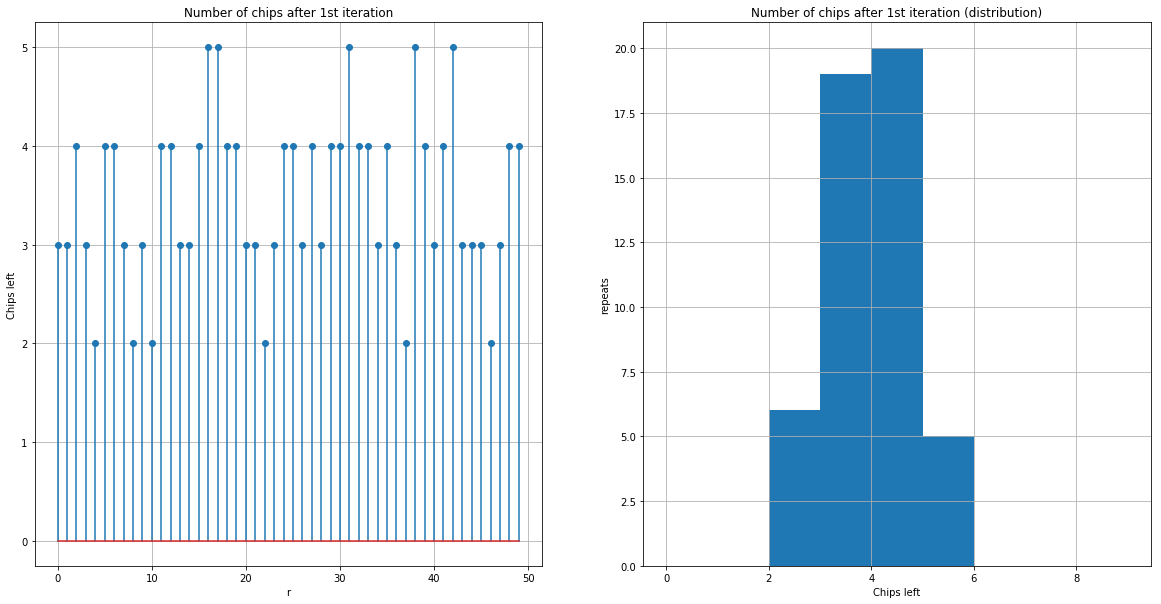

Max: 5 Min: 2 Avg: 3.48


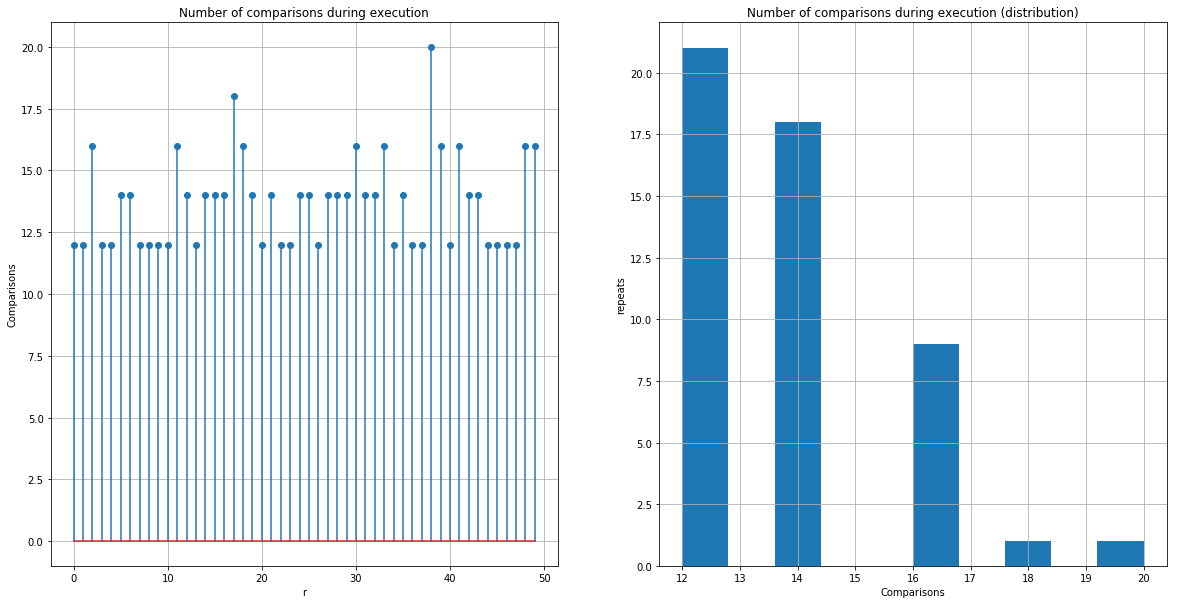

Max: 20 Min: 12 Avg: 13.72


In [169]:
chipTest(N, 6, R)

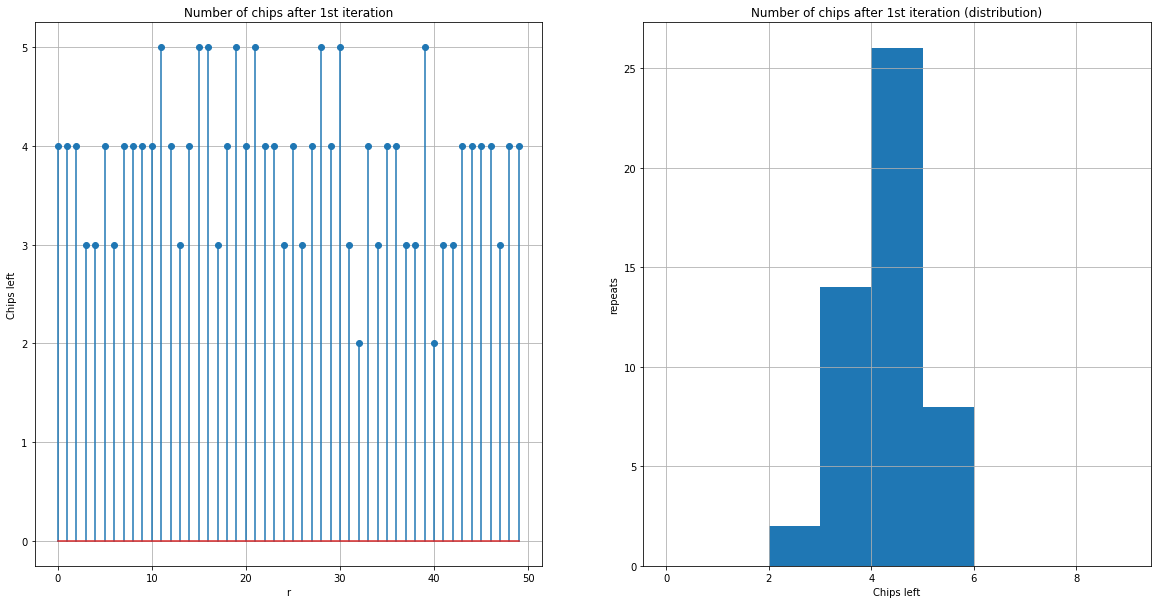

Max: 5 Min: 2 Avg: 3.8


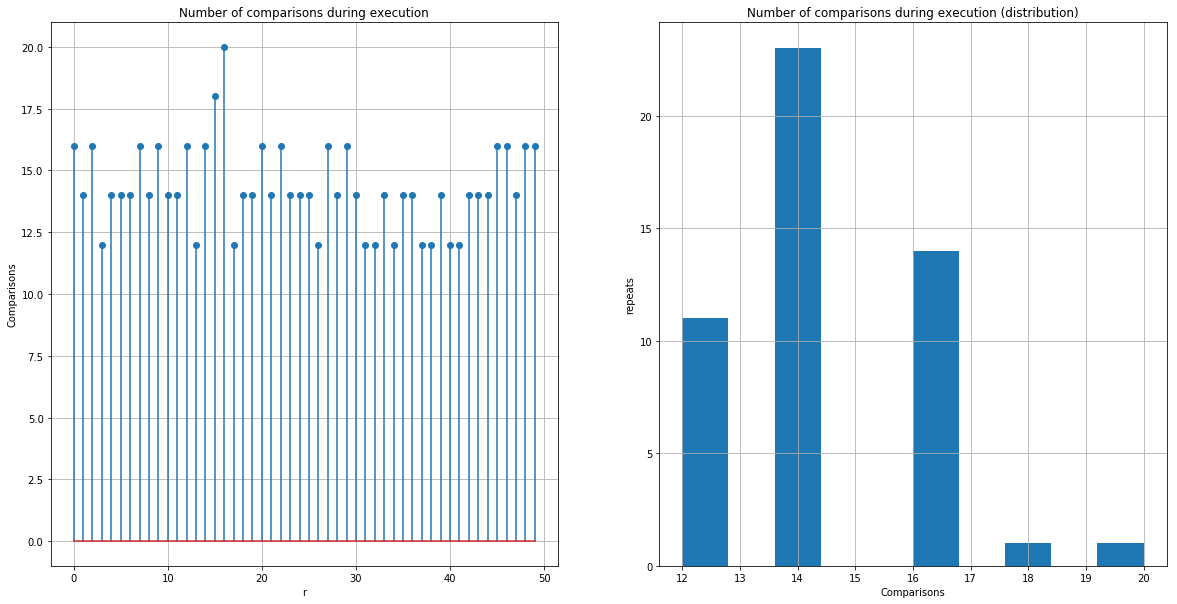

Max: 20 Min: 12 Avg: 14.32


In [170]:
chipTest(N, 7, R)

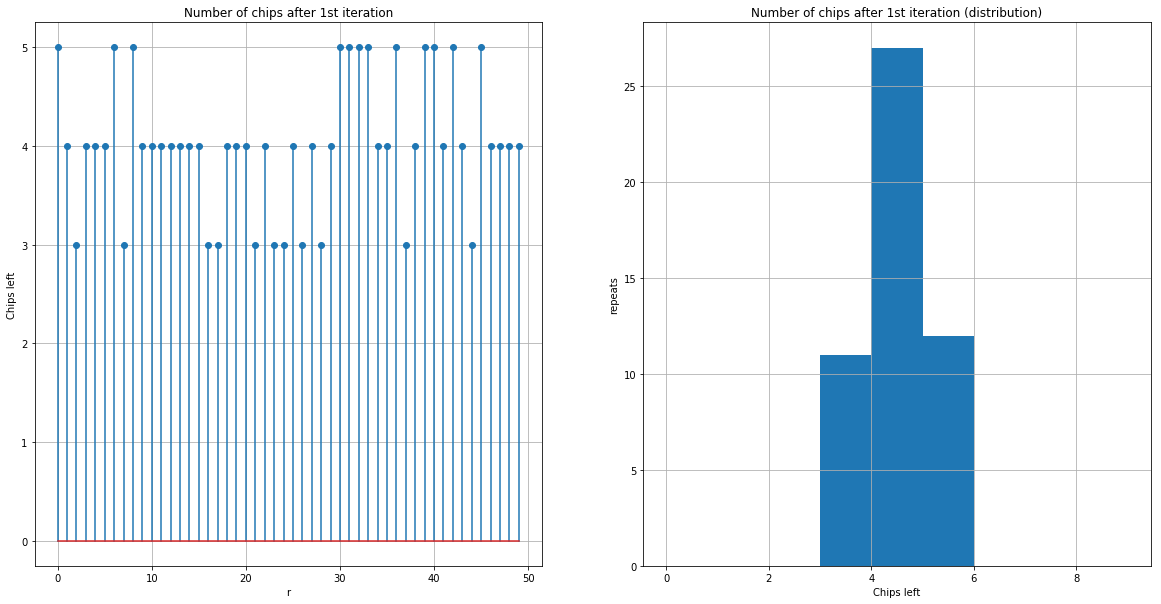

Max: 5 Min: 3 Avg: 4.02


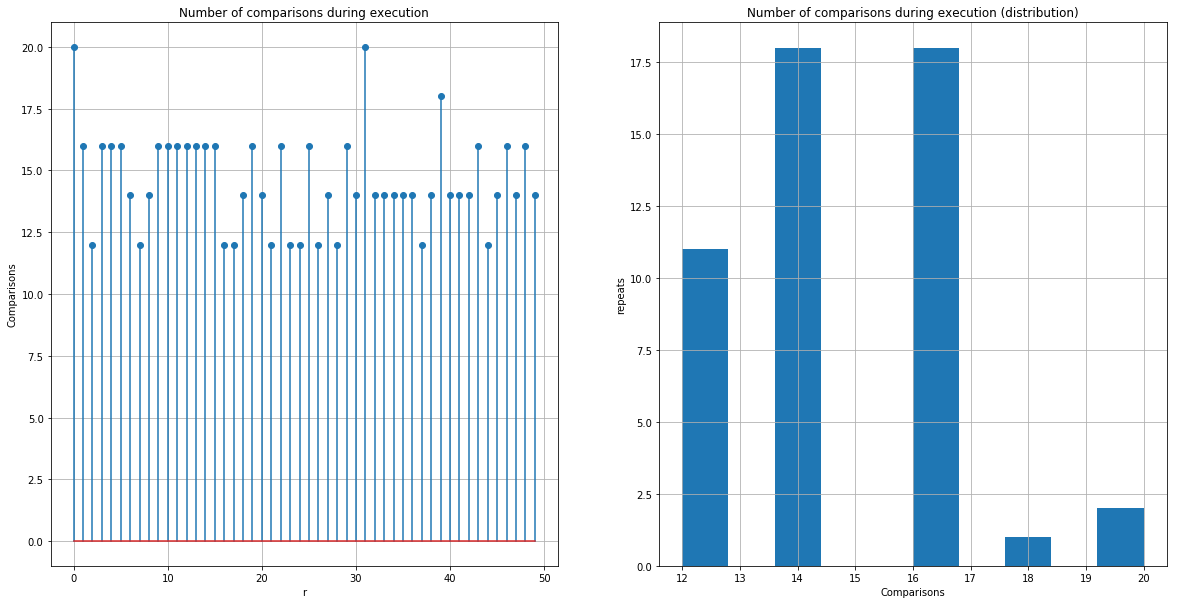

Max: 20 Min: 12 Avg: 14.6


In [171]:
chipTest(N, 8, R)

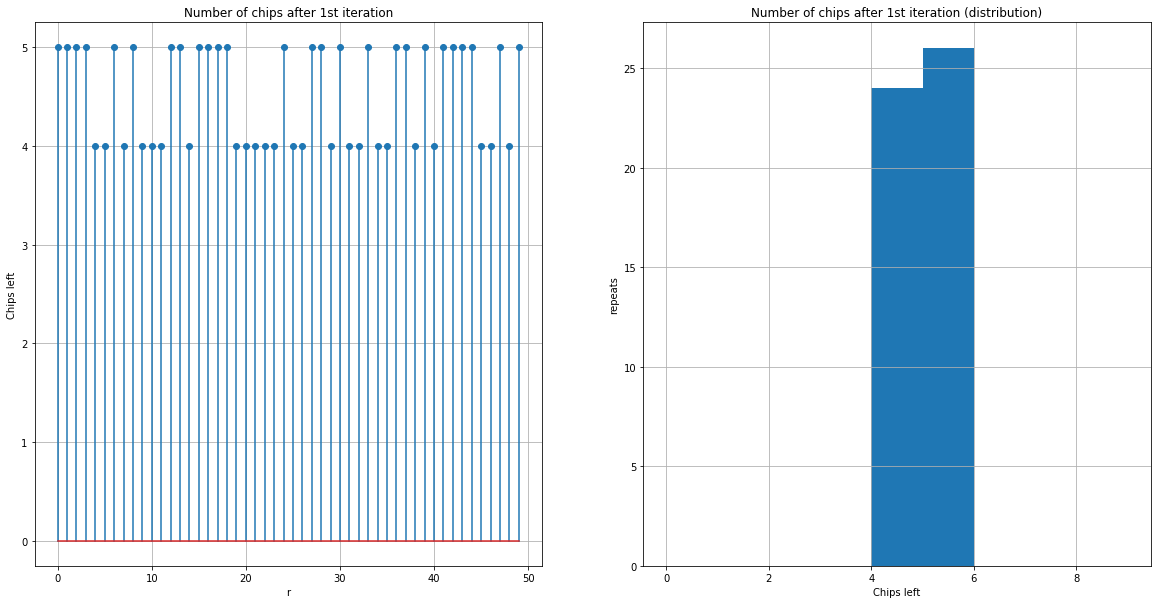

Max: 5 Min: 4 Avg: 4.52


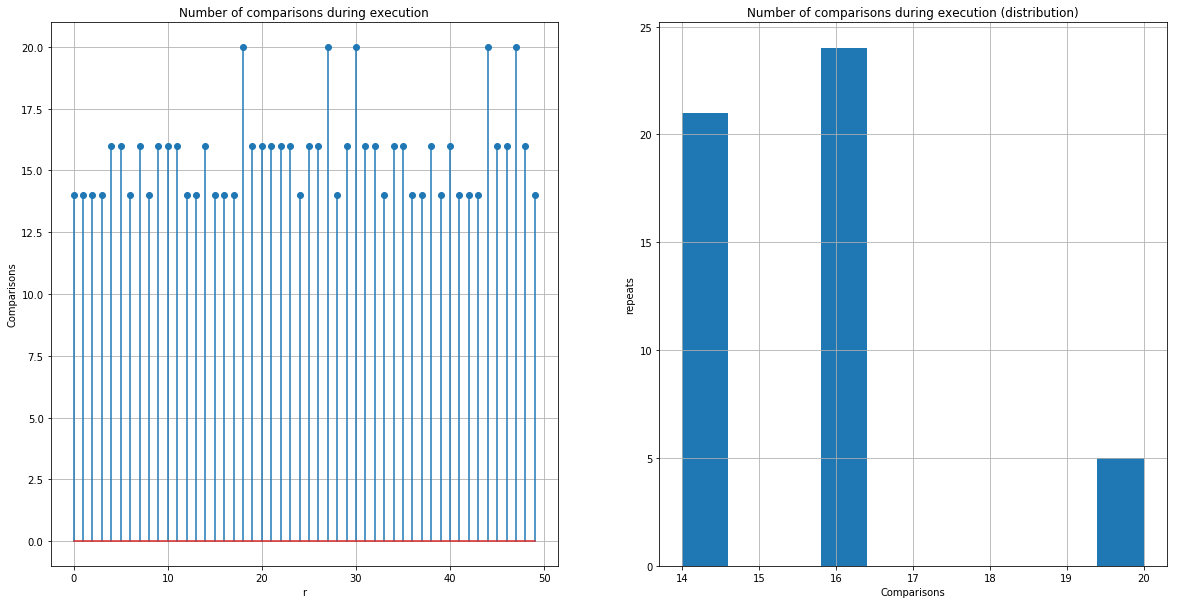

Max: 20 Min: 14 Avg: 15.56


In [172]:
chipTest(N, 9, R)

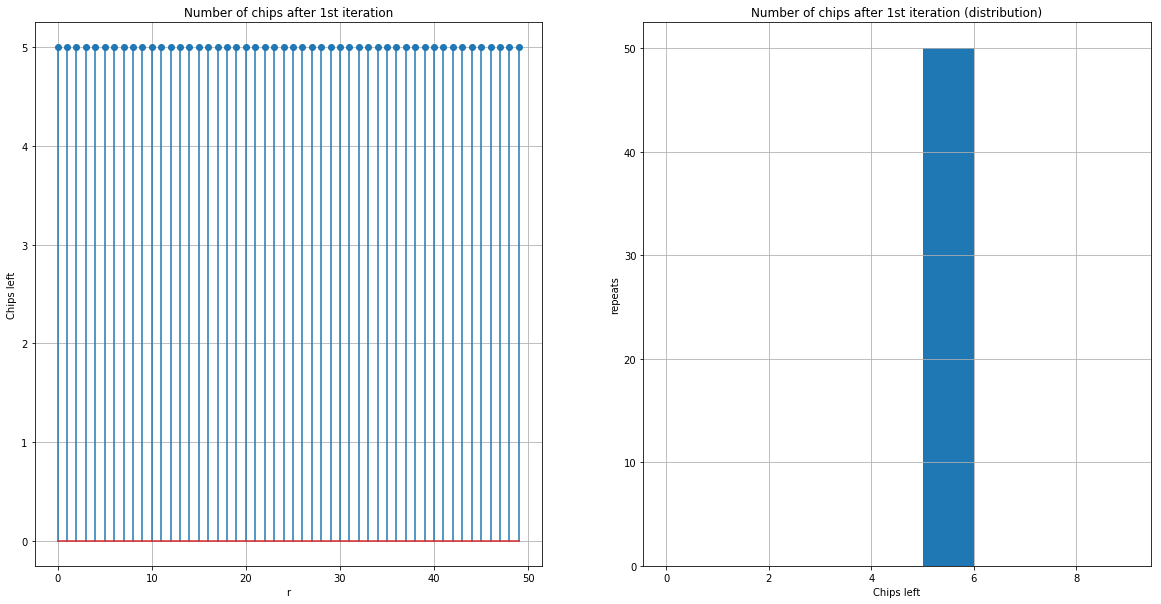

Max: 5 Min: 5 Avg: 5.0


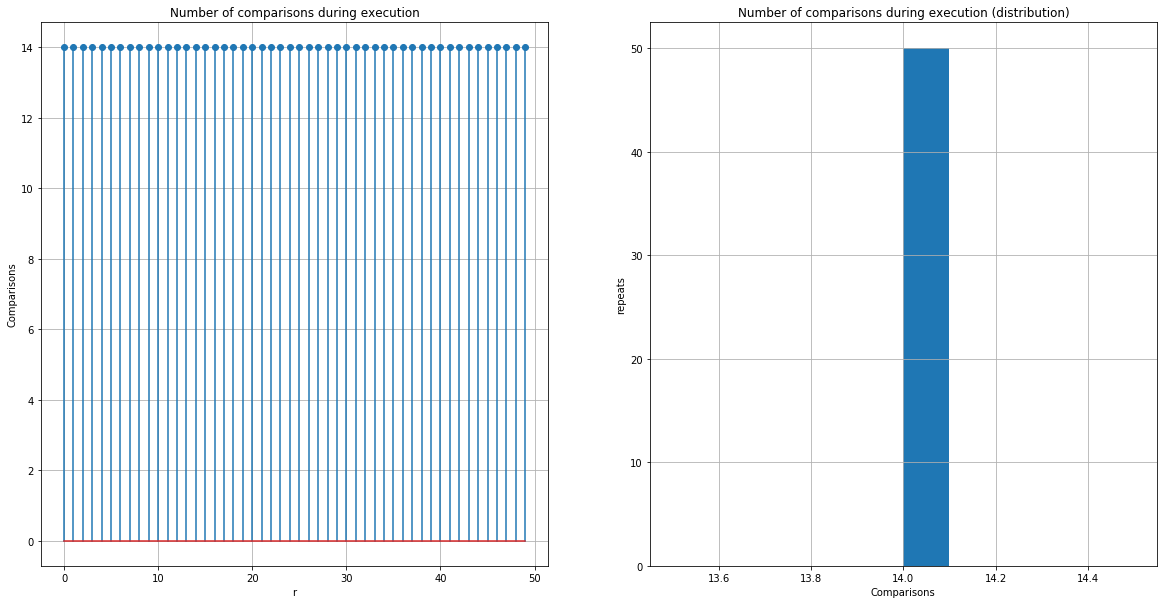

Max: 14 Min: 14 Avg: 14.0


In [173]:
chipTest(N, 10, R)